In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import torch

import constant
from constant import org_cols, wsr_cols, geo_pow_cols, semigeo_cols
from myplot import timelines_longtime, err_distribution
from models import model_evaluation, model_improvement, NRMSE_all, RMSE_all
path = "SL_SC_1/"
model_path = constant.model_path + path
plot_path = constant.plot_path + path
error_path = constant.error_path + path


# Evaluation

## load evaluation data, models, features

In [3]:
df_evl = pd.read_parquet(constant.SL_SC_EVL_path)
df_evl["TIME_CET"] = pd.to_datetime(df_evl["TIME_CET"])

In [4]:
model_original = torch.load(model_path + "original_model.pth")
model_wsr = torch.load(model_path + "wsr_model.pth")
model_geo = torch.load(model_path + "geo_model.pth")
model_semigeo = torch.load(model_path + "semigeo_model.pth")

In [5]:
# ahead = "Hours_Ahead0_"
# original_errs= model_evaluation(df_evl, org_cols, model_original, days=False)
# wsr_errs= model_evaluation(df_evl, wsr_cols, model_wsr, days=False)
# geo_errs= model_evaluation(df_evl, geo_pow_cols, model_geo, days=False)
# semigeo_errs= model_evaluation(df_evl, semigeo_cols, model_semigeo, days=False)

In [6]:
ahead = "Hours_Ahead1_"
ah = 1
original_errs= model_evaluation(df_evl, org_cols, model_original, days=False, ahead=ah)
wsr_errs= model_evaluation(df_evl, wsr_cols, model_wsr, days=False, ahead=ah)
geo_errs= model_evaluation(df_evl, geo_pow_cols, model_geo, days=False, ahead=ah)
semigeo_errs= model_evaluation(df_evl, semigeo_cols, model_semigeo, days=False, ahead=ah)

In [7]:
time=original_errs["TIME_CET"]

In [8]:
# myplot.timelines(time, 
# {"Original":original_errs["NRMSE"], "Windshear":wsr_errs["NRMSE"], "Geo":geo_errs["NRMSE"], "Semigeo":semigeo_errs["NRMSE"]}, ylabel="NRMSE (MW)", fulltime=True, path=plot_path+ahead+"NRMSE_Hours.png")

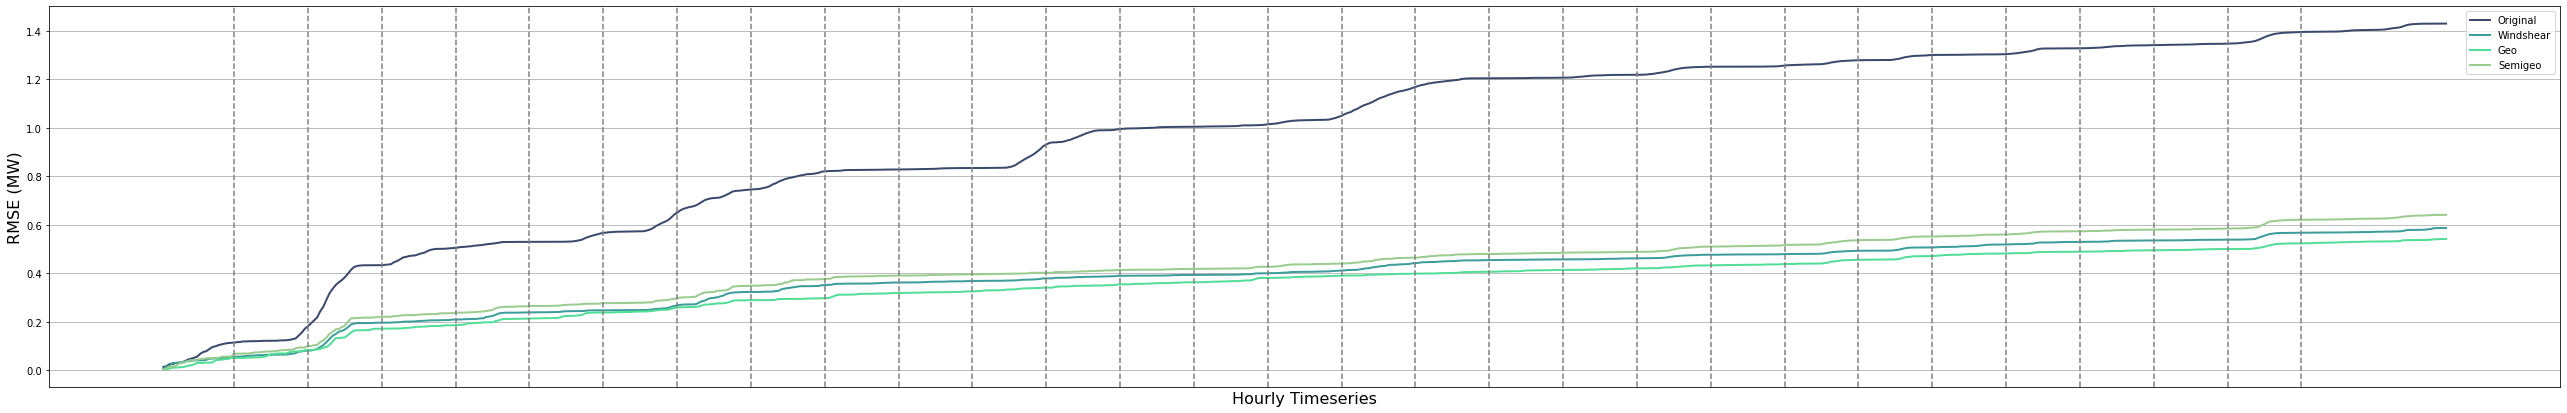

In [9]:
timelines_longtime(time, 
{"Original":original_errs["RMSE"], "Windshear":wsr_errs["RMSE"], "Geo":geo_errs["RMSE"], "Semigeo":semigeo_errs["RMSE"]}, ylabel="RMSE (MW)", xlabel="Hourly Timeseries", path=plot_path+ahead+"RMSE.png")

### Error Distribution

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

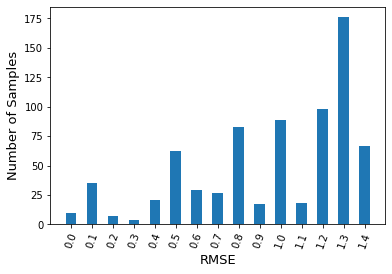

In [12]:
err_distribution(original_errs, round_as=1, path=plot_path+ahead+"OGN_Errdisb.png")

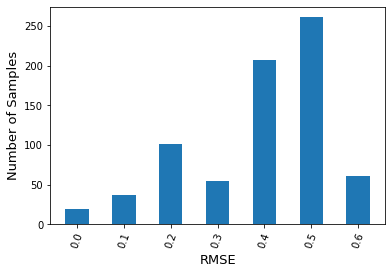

In [13]:
err_distribution(wsr_errs, round_as=1 ,path=plot_path+ahead+"WSR_Errdisb.png")

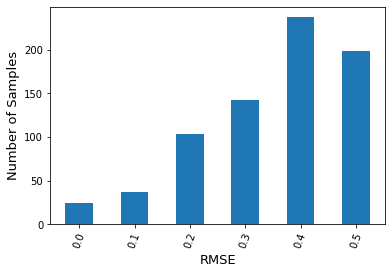

In [14]:
err_distribution(geo_errs, round_as=1, path=plot_path+ahead+"GEO_Errdisb.png")

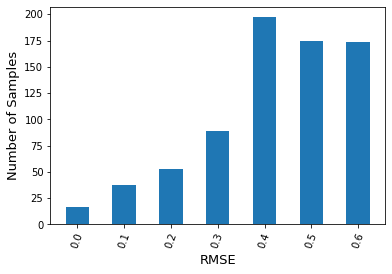

In [15]:
err_distribution(semigeo_errs, round_as=1, path=plot_path+ahead+"SEMIGEO_Errdisb.png")

## Prediction

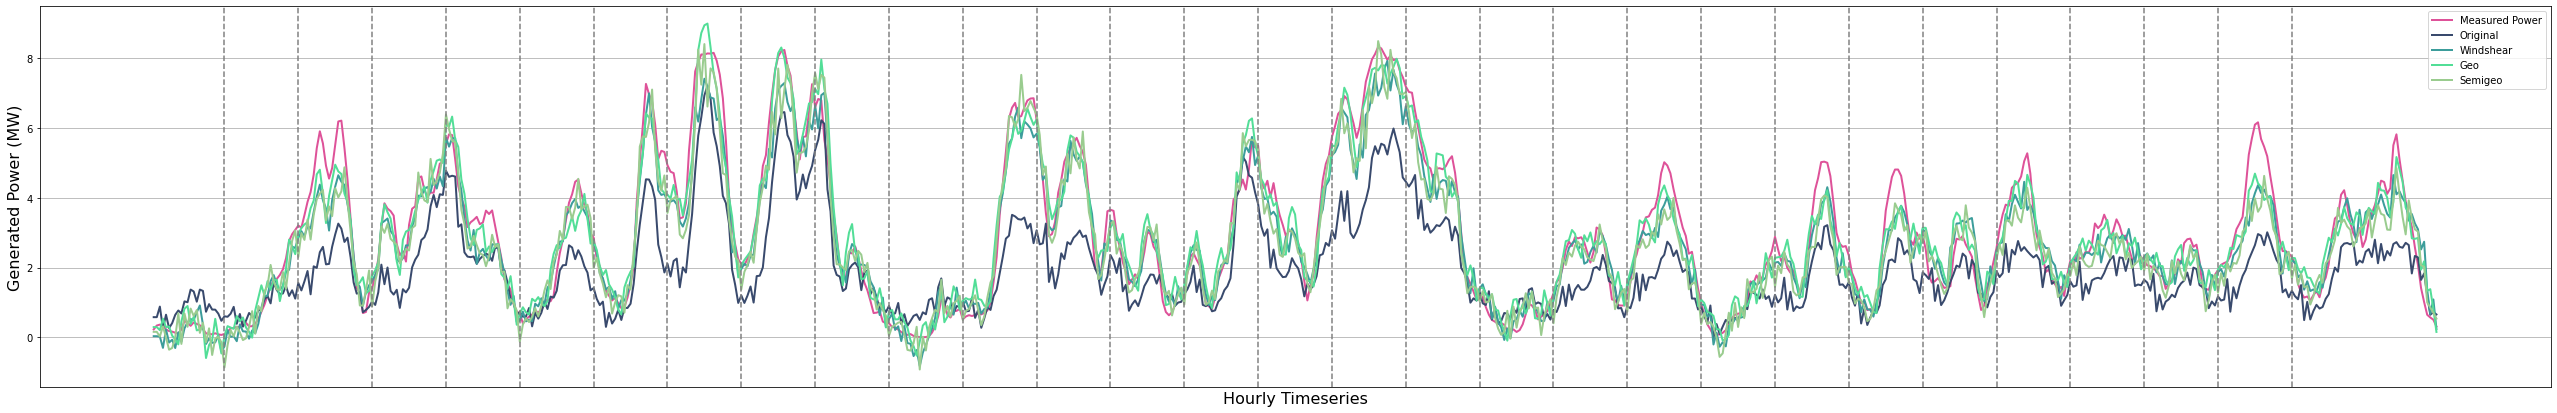

In [16]:
timelines_longtime(time, 
{"Measured Power":original_errs["VAERDI"], "Original":original_errs["pred"], "Windshear":wsr_errs["pred"], "Geo":geo_errs["pred"], "Semigeo":semigeo_errs["pred"]}, ylabel="Generated Power (MW)", xlabel="Hourly Timeseries",  path=plot_path+ahead+"Power.png")

#### Model Comparement

In [17]:
# print(NRMSE_all(original_errs))
# print(NRMSE_all(wsr_errs))
# print(NRMSE_all(geo_errs))
# print(NRMSE_all(semigeo_errs))

In [18]:
print(RMSE_all(original_errs))
print(RMSE_all(wsr_errs))
print(RMSE_all(geo_errs))
print(RMSE_all(semigeo_errs))

1.4295095084015632
0.5862612291316153
0.5409509918870714
0.64049095679477


In [19]:
imp_RMSE, r2 = model_improvement({"Original": original_errs, "Windshear": wsr_errs, "Geo": geo_errs, "Semigeo": semigeo_errs}, "RMSE")
r2

{'Original': 0.507, 'Windshear': 0.917, 'Geo': 0.929, 'Semigeo': 0.901}

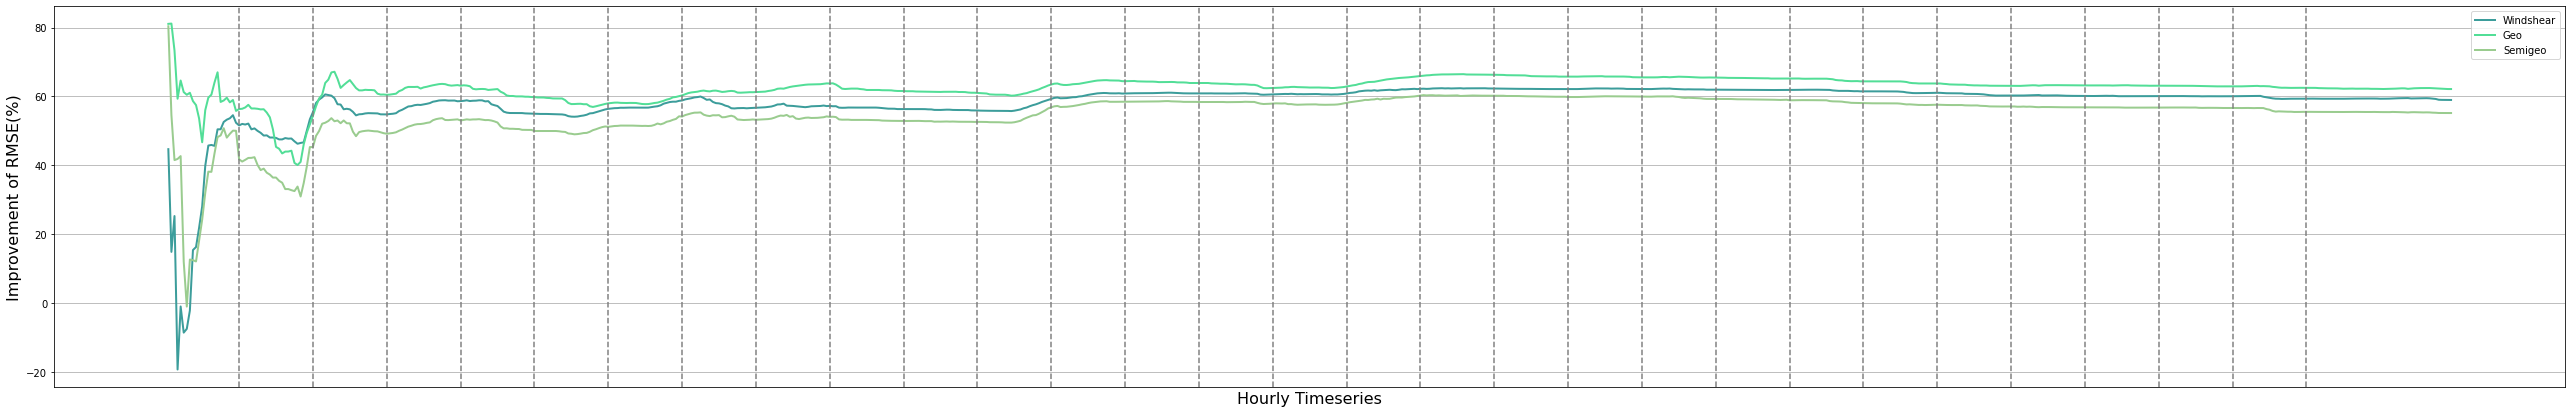

In [20]:
timelines_longtime(time, 
{"Windshear":imp_RMSE["Windshear"]["Original"], "Geo":imp_RMSE["Geo"]["Original"], "Semigeo":imp_RMSE["Semigeo"]["Original"]}, ylabel="Improvement of RMSE(%)", xlabel="Hourly Timeseries", path=plot_path+ahead+"Improvement_RMSE.png")